In [1]:
import yfinance as yf
from classes.backtest import Backtest
from classes.report import Report
import seaborn
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [2]:
symbol='VALE3.SA'
df=yf.download(symbol)
df=df.reset_index().values
dm = Backtest(symbol,df)
trades=dm.main()

[*********************100%%**********************]  1 of 1 completed

Initializing backtest

Skipping 2000-01-03 00:00:00 due to history lack of data.

Finish backtest




					Trading VALE3.SA backtest:

Gross Profit: 			 22626.05			Winner trades:  1287
Gross Loss: 			 -23529.0			Losing trades:  1064
Profit Trades (% of total): 	 54.53 %
Profit factor: 			 0.96
Largest profit trade: 		 114.34				Largest loss trade:  -115.57
Average profit trade: 		 17.58				Average loss trade:  -22.11 

Profit/Loss: 			 0.79
Total Net profit: 		 -903.06
Percentual return: 		 -50.33 %

Balance Drawdown Maximal: 	 1794.4
Balance Drawdown Maximal Time Range: 2011-03-01 00:00:00  until  2023-10-26 00:00:00


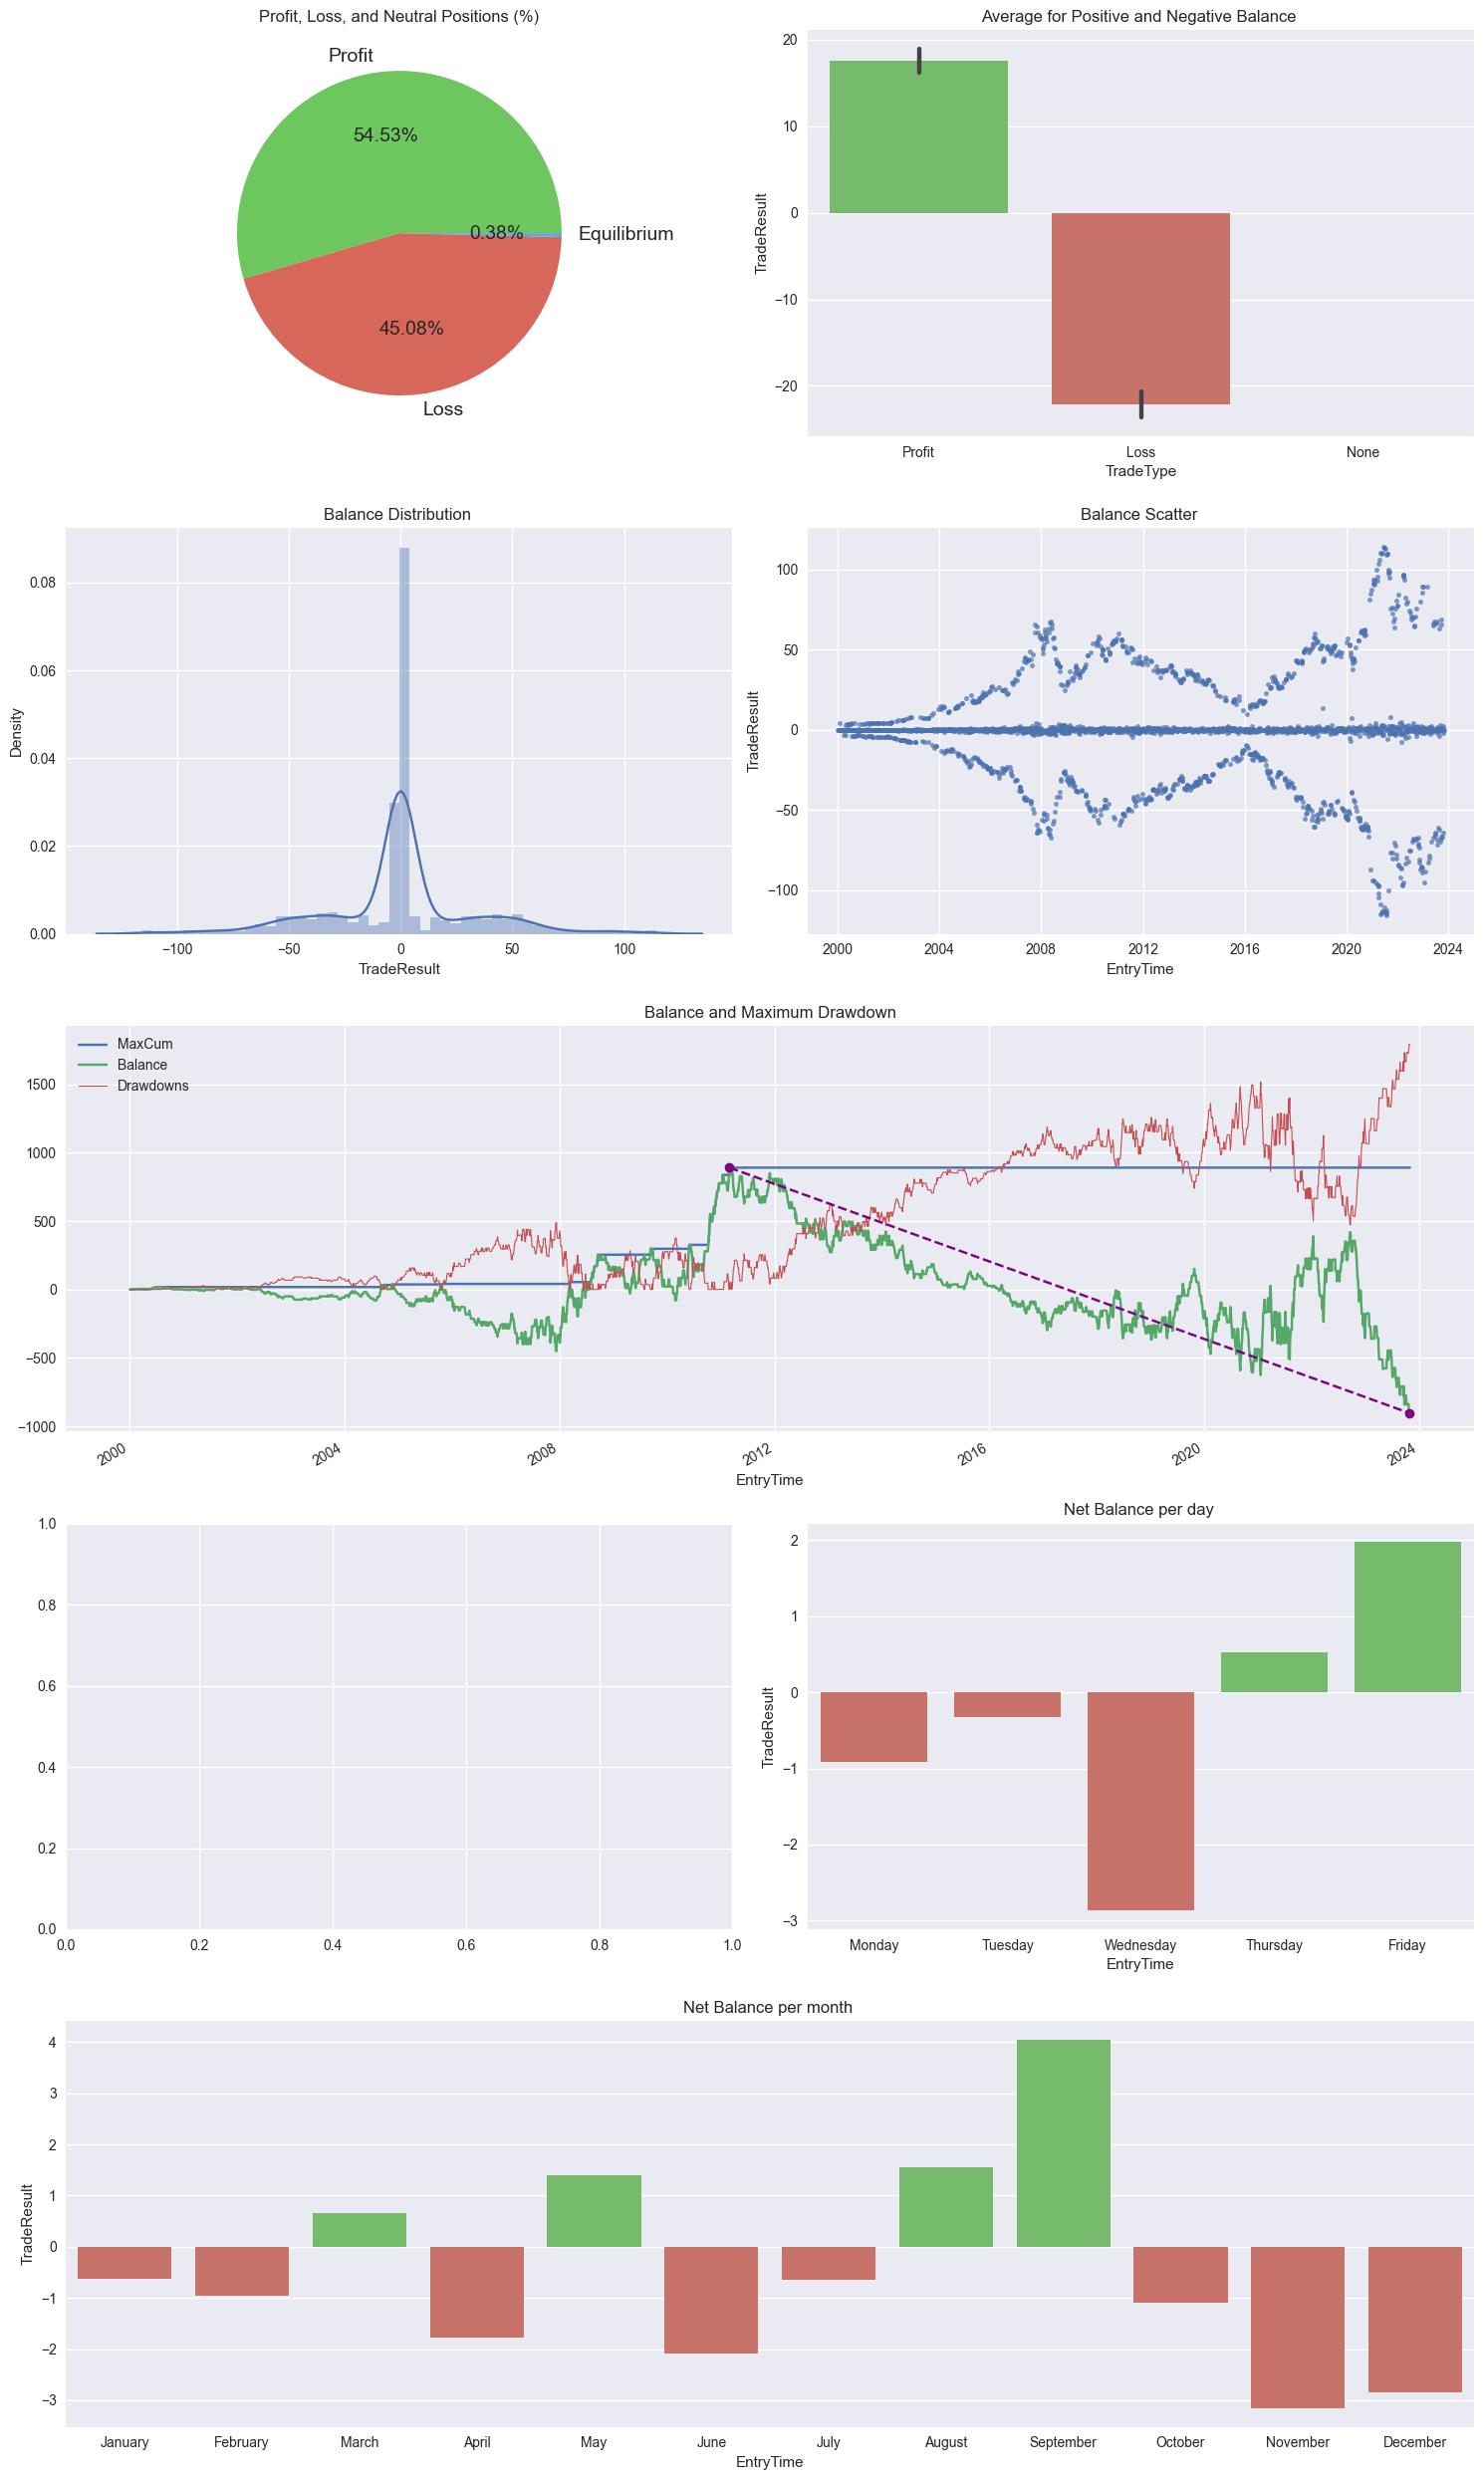

In [3]:
dm.get_report_pointer().plot_report()